# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Durante este proyecto se estaran evaluando los diferentes factores que influyen en la venta de un auto así como a realción que
puede haber entre ellos.

Dichos factores a revisar seran:

* Los años del vehiculo
* El millaje
* Precio
* Estado del vehiculo
* Cilindrada
* Color

Previamente se realizarán los siguientes pasos:

* Revisión de datos
* Busqueda y eliminación de valores ausentes
* Crear nuevas columnas que aporten información adicional a la que se suministra

Para realizar el analisis de la información se realizarán segmentación de datos así como también diferentes tipos de gráficos como, histográmas, gráficos de caja, de dispersión y de barras.

Finalmente se realizarán las conclusiones generales del proyecto

# Contenido

2.1 Inicialización

2.2 Tratar Valores ausentes

2.3 Corregir los tipos de datos

2.4 Enriquecer los datos

2.5 Comprobar los datos limpios

2.6 Estudiar los parametros principales

2.7 Estudiar y tratar los valores atípicos

2.8 Estudiar parámetros principales sin valores atípicos

2.9 Periodo de colocación de artículos

2.10 Preciopromedio por cada tipo de vehículo

2.11 Factores de precio

2.12 Conclusiones generales

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame
cars_data= pd.read_csv("/datasets/vehicles_us.csv")


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [3]:
# imprime la información general/resumida sobre el DataFrame
cars_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
cars_data.head(20)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


 En la información preliminar se ven columnas que están en un formato erroneo, por ejemplo date_posted que es object y deberia ser tipo date o model_year que se muestra como float en lugar de ser tipo int, otra observación es que hay columnas que contienen valores ausentes.

La columna date_posted está como object y no como fecha, model_year está como float en lugar de ser una columna int

Se puede observar que, las columnas de model_year,odometer, cylinders y paint_color tienen valores ausentes, en la columna is_4wd, los valores ausentes se pueden deber a que si no es 4x4 debe ser 0, por el contario si lo posee es 1, esta última es la que posee la mayor cantidad de valores ausentes

### Conclusiones y siguientes pasos



Hasta el momento se han detectado problemas en el DataFrame, se tendrán que realizar varios pasos para que quede apto para el analisis de los datos que contiene.

Los pasos a seguir serán los siguientes:

* Imputar los valores ausentes en las columnas que lo necesiten
* Cambiar los tipos de datos en aquellas columnas que lo necesiten
* De ser necesario se agregarán columnas para mejorar el analis de la información

## Tratar los valores ausentes (si hay)

In [5]:
#Recuento de NaN por columna
print(cars_data.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [6]:
#Revisando si el DF contiene datos duplicados
cars_data.duplicated().sum()

0

In [7]:
#Corrigiendo los NaN en la columna is_4wd
print(cars_data.loc[:,["is_4wd", "model", "type", "model_year"]])

       is_4wd           model    type  model_year
0         1.0          bmw x5     SUV      2011.0
1         1.0      ford f-150  pickup         NaN
2         NaN  hyundai sonata   sedan      2013.0
3         NaN      ford f-150  pickup      2003.0
4         NaN    chrysler 200   sedan      2017.0
...       ...             ...     ...         ...
51520     NaN   nissan maxima   sedan      2013.0
51521     NaN     honda civic   sedan      2002.0
51522     NaN  hyundai sonata   sedan      2009.0
51523     NaN  toyota corolla   sedan      2013.0
51524     NaN   nissan altima   sedan      2014.0

[51525 rows x 4 columns]


In [8]:
#La columna is_4wd es una columna booleana, es decir si tiene 4x4 es 1, si no la tiene deberia ser 0, esto se puede
#confirmar observando a que tipos de autos corresponde los NaN, en su mayoria sedan, algunas pickups dependiendo 
#de la versión tampoco la tienen.
cars_data["is_4wd"].fillna(0, inplace=True)

In [9]:
cars_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [10]:
#Imputando la columna cylinders para eliminar rellenar los NaN
cars_data.loc[cars_data["cylinders"].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,0.0,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28


In [11]:
#Se realiza un slice por modelo para observar el número de cilindros
cars_data.query('model=="ford f-150"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
39,8000,2009.0,ford f-150,good,8.0,gas,234000.0,automatic,truck,black,1.0,2019-03-31,1
50,6200,2006.0,ford f-150,excellent,6.0,gas,69698.0,automatic,truck,custom,0.0,2018-05-03,50
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51403,19350,2013.0,ford f-150,excellent,8.0,gas,76474.0,automatic,truck,white,1.0,2018-08-23,50
51419,19900,2013.0,ford f-150,good,6.0,gas,43855.0,automatic,truck,black,1.0,2018-06-02,30
51425,8495,2006.0,ford f-150,good,8.0,gas,96926.0,automatic,truck,NaN,1.0,2018-09-23,28
51434,3495,2007.0,ford f-150,good,8.0,gas,136782.0,automatic,truck,blue,0.0,2018-10-22,92


In [12]:
#Se aplicará la mediana para obtener los cilindros por modelo.
cylinders_median= cars_data.groupby(["model"])["cylinders"].agg({"median"}).reset_index()
cylinders_median

,model,median
0,acura tl,6.0
1,bmw x5,6.0
2,buick enclave,6.0
3,cadillac escalade,8.0
4,chevrolet camaro,6.0
...,...,...
95,toyota sienna,6.0
96,toyota tacoma,6.0
97,toyota tundra,8.0
98,volkswagen jetta,4.0


In [13]:
cars_data= cars_data.merge(cylinders_median, on= "model", how="left")
cars_data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,6.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,8.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,4.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,8.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,4.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,6.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,4.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,6.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,4.0
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,6.0


In [14]:
cars_data.loc[cars_data["cylinders"].isna(),"cylinders"]=cars_data.loc[cars_data["cylinders"].isna(),"median"]

In [15]:
cars_data.head(40)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,6.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,8.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,4.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,8.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,4.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,6.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,4.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,6.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,4.0
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,6.0


In [16]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  median        51525 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.9+ MB


In [160]:
#Reemplazando los valores ausentes para la columna model_year utilizando to_dict y una función

In [18]:
model_year_median= cars_data.groupby(["model", "condition"])["model_year"].median().to_dict()

def fill_nan_values (row):
    if np.isnan (row["model_year"]):
        return model_year_median.get((row["model"], row["condition"]))
    return row["model_year"]

cars_data["model_year"]=cars_data.apply(fill_nan_values, axis=1)
cars_data.info(verbose= True)
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51519 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  median        51525 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.9+ MB


In [19]:
#Reemplazando los valores ausentes en la columna odometer
odometer_median= cars_data.groupby(["model", "condition"])["odometer"].median().to_dict()

def fill_nan_values_odo (row):
    if np.isnan (row["odometer"]):
        return odometer_median.get((row["model"], row["condition"]))
    return row["odometer"]

cars_data["odometer"]=cars_data.apply(fill_nan_values_odo, axis=1)
cars_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51519 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51475 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  median        51525 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.9+ MB


In [20]:
#Para la columna paint_color, como es una característica que se desconoce y no se puede iterar para reemplazarlo
#se reemplazará por la cadena "unknown"

cars_data["paint_color"]= cars_data["paint_color"].fillna("unknown") 
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51519 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51475 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  median        51525 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.9+ MB


In [161]:
#La cantidad de valores NaN que restan después de haber rellenado dichos valores, procederemos a eliminarlos ya que es una 
#cantidad muy pequeña que no afectará el estudio de los datos
cars_data.dropna(inplace=True)


In [22]:
#Revisando que todos los NaN hayan sido eliminados
cars_data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
median          0
dtype: int64

In [23]:
cars_data= cars_data.reset_index(drop=True)


In [24]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51470 entries, 0 to 51469
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51470 non-null  int64  
 1   model_year    51470 non-null  float64
 2   model         51470 non-null  object 
 3   condition     51470 non-null  object 
 4   cylinders     51470 non-null  float64
 5   fuel          51470 non-null  object 
 6   odometer      51470 non-null  float64
 7   transmission  51470 non-null  object 
 8   type          51470 non-null  object 
 9   paint_color   51470 non-null  object 
 10  is_4wd        51470 non-null  float64
 11  date_posted   51470 non-null  object 
 12  days_listed   51470 non-null  int64  
 13  median        51470 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.5+ MB


In [25]:
cars_data.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median
51465,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,6.0
51466,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,4.0
51467,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,4.0
51468,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,4.0
51469,6300,2014.0,nissan altima,good,4.0,gas,115676.0,automatic,sedan,unknown,0.0,2018-06-05,10,4.0


## Corregir los tipos de datos

Revisando los tipos de datos suministrados por el método .info(), hay columnas que tienen tipos de datos que no se corresponden. A continuación se procederá a cambiarlos

In [26]:
#Revisando los tipos de datos en cada columna
cars_data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
median          float64
dtype: object

In [27]:
cars_data2=cars_data

**Cambiando las columnas de tipo object a tipo int**

In [28]:
cars_data2[["odometer", "cylinders", "is_4wd"]]=cars_data2[["odometer", "cylinders", "is_4wd"]].astype("int")

In [29]:
cars_data2.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders         int64
fuel             object
odometer          int64
transmission     object
type             object
paint_color      object
is_4wd            int64
date_posted      object
days_listed       int64
median          float64
dtype: object

**Cambiando las columnas de fecha al formato correspondiente**

In [30]:
cars_data2["date_posted"]=pd.to_datetime(cars_data2["date_posted"], format= "%Y-%m-%d")

In [31]:
cars_data2["model_year"]=pd.to_datetime(cars_data2["model_year"], format= "%Y")

In [32]:
cars_data2.dtypes

price                    int64
model_year      datetime64[ns]
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
median                 float64
dtype: object

## Enriquecer datos

In [33]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio



In [34]:
#Agregando día, mes y año cuando el anuncio fue colocado
cars_data2["day_posted"] =cars_data2["date_posted"].dt.day

cars_data2["month_posted"] = cars_data2["date_posted"].dt.month

cars_data2['year_posted'] = cars_data2['date_posted'].dt.year



In [35]:
# Agrega los años del vehículo cuando el anuncio se colocó
cars_data2["cars_year"]=cars_data2["model_year"].dt.year
cars_data2["years_until_posted"] = cars_data2["year_posted"]-cars_data2["cars_year"]

In [36]:
cars_data2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median,day_posted,month_posted,year_posted,cars_year,years_until_posted
0,9400,2011-01-01,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,6.0,23,6,2018,2011,7
1,25500,2008-01-01,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,8.0,19,10,2018,2008,10
2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,4.0,7,2,2019,2013,6
3,1500,2003-01-01,ford f-150,fair,8,gas,191850,automatic,pickup,unknown,0,2019-03-22,9,8.0,22,3,2019,2003,16
4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4.0,2,4,2019,2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51465,9249,2013-01-01,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,6.0,3,10,2018,2013,5
51466,2700,2002-01-01,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,4.0,14,11,2018,2002,16
51467,3950,2009-01-01,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,4.0,15,11,2018,2009,9
51468,7455,2013-01-01,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,4.0,2,7,2018,2013,5


In [37]:
cars_data2.dtypes

price                          int64
model_year            datetime64[ns]
model                         object
condition                     object
cylinders                      int64
fuel                          object
odometer                       int64
transmission                  object
type                          object
paint_color                   object
is_4wd                         int64
date_posted           datetime64[ns]
days_listed                    int64
median                       float64
day_posted                     int64
month_posted                   int64
year_posted                    int64
cars_year                      int64
years_until_posted             int64
dtype: object

In [38]:
# Agrega el millaje promedio del vehículo por año
#Previamente hay que corregir las celdas donde el año es 0 porque sino dará un millaje infinito
cars_data2["years_until_posted"]=cars_data2["years_until_posted"].replace(0,1)
cars_data2["miles_per_year"]= cars_data2["odometer"]/cars_data2["years_until_posted"]
cars_data2


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median,day_posted,month_posted,year_posted,cars_year,years_until_posted,miles_per_year
0,9400,2011-01-01,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,6.0,23,6,2018,2011,7,20714.285714
1,25500,2008-01-01,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,8.0,19,10,2018,2008,10,8870.500000
2,5500,2013-01-01,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,4.0,7,2,2019,2013,6,18333.333333
3,1500,2003-01-01,ford f-150,fair,8,gas,191850,automatic,pickup,unknown,0,2019-03-22,9,8.0,22,3,2019,2003,16,11990.625000
4,14900,2017-01-01,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4.0,2,4,2019,2017,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51465,9249,2013-01-01,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,6.0,3,10,2018,2013,5,17627.200000
51466,2700,2002-01-01,honda civic,salvage,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,4.0,14,11,2018,2002,16,11343.750000
51467,3950,2009-01-01,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,4.0,15,11,2018,2009,9,14222.222222
51468,7455,2013-01-01,toyota corolla,good,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,4.0,2,7,2018,2013,5,27914.600000


In [39]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
def condition_numeric (row):
    if row=="new":
        return 5
    if row=="like new":
        return 4
    if row=="excellent":
        return 3
    if row=="good":
        return 2
    if row=="fair":
        return 1
    if row=="salvage":
        return 0
cars_data2["condition"]=cars_data2["condition"].apply(condition_numeric)


In [40]:
cars_data2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median,day_posted,month_posted,year_posted,cars_year,years_until_posted,miles_per_year
0,9400,2011-01-01,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,6.0,23,6,2018,2011,7,20714.285714
1,25500,2008-01-01,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,8.0,19,10,2018,2008,10,8870.500000
2,5500,2013-01-01,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,4.0,7,2,2019,2013,6,18333.333333
3,1500,2003-01-01,ford f-150,1,8,gas,191850,automatic,pickup,unknown,0,2019-03-22,9,8.0,22,3,2019,2003,16,11990.625000
4,14900,2017-01-01,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4.0,2,4,2019,2017,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51465,9249,2013-01-01,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,6.0,3,10,2018,2013,5,17627.200000
51466,2700,2002-01-01,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,4.0,14,11,2018,2002,16,11343.750000
51467,3950,2009-01-01,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,4.0,15,11,2018,2009,9,14222.222222
51468,7455,2013-01-01,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,4.0,2,7,2018,2013,5,27914.600000


## Comprobar datos limpios

[Dado que los datos están listos para el análisis, échales otro vistazo rápido. Es útil ver qué es exactamente lo que vas a utilizar para el análisis.]

In [41]:
# imprime la información general/resumida sobre el DataFrame

cars_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51470 entries, 0 to 51469
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51470 non-null  int64         
 1   model_year          51470 non-null  datetime64[ns]
 2   model               51470 non-null  object        
 3   condition           51470 non-null  int64         
 4   cylinders           51470 non-null  int64         
 5   fuel                51470 non-null  object        
 6   odometer            51470 non-null  int64         
 7   transmission        51470 non-null  object        
 8   type                51470 non-null  object        
 9   paint_color         51470 non-null  object        
 10  is_4wd              51470 non-null  int64         
 11  date_posted         51470 non-null  datetime64[ns]
 12  days_listed         51470 non-null  int64         
 13  median              51470 non-null  float64   

In [42]:
# imprimir una muestra de datos
cars_data2.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median,day_posted,month_posted,year_posted,cars_year,years_until_posted,miles_per_year
0,9400,2011-01-01,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,6.0,23,6,2018,2011,7,20714.285714
1,25500,2008-01-01,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,8.0,19,10,2018,2008,10,8870.500000
2,5500,2013-01-01,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,4.0,7,2,2019,2013,6,18333.333333
3,1500,2003-01-01,ford f-150,1,8,gas,191850,automatic,pickup,unknown,0,2019-03-22,9,8.0,22,3,2019,2003,16,11990.625000
4,14900,2017-01-01,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4.0,2,4,2019,2017,2,40451.500000
5,14990,2014-01-01,chrysler 300,3,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,6.0,20,6,2018,2014,4,14488.500000
6,12990,2015-01-01,toyota camry,3,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,4.0,27,12,2018,2015,3,26404.000000
7,15990,2013-01-01,honda pilot,3,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,6.0,7,1,2019,2013,6,18245.500000
8,11500,2012-01-01,kia sorento,3,4,gas,104174,automatic,SUV,unknown,1,2018-07-16,19,4.0,16,7,2018,2012,6,17362.333333
9,9200,2008-01-01,honda pilot,3,6,gas,147191,automatic,SUV,blue,1,2019-02-15,17,6.0,15,2,2019,2008,11,13381.000000


## Estudiar parámetros principales

Para estudiar los parametros principales listados abajo, se utilizaran histogramas para determinar si hay valores atipicos que puedan distorsionar los resultados de los analisis a realizar

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [43]:
#Visualizando las columnas para tener una mejor idea de las relaciones que se pueden formar para lograr los gráficos
cars_data2.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'median', 'day_posted', 'month_posted',
       'year_posted', 'cars_year', 'years_until_posted', 'miles_per_year'],
      dtype='object')

<AxesSubplot:>

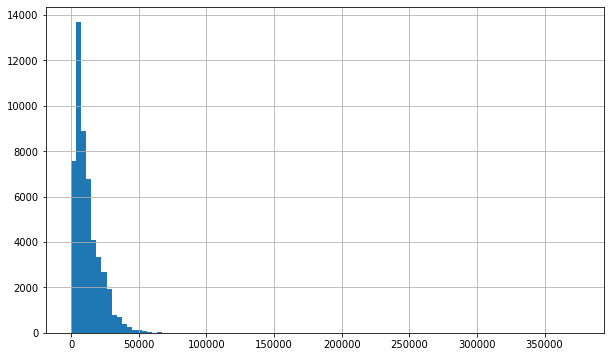

In [169]:
#Se realiza un histograma de precios para observar la distribución de los precios de los vehiculos

cars_data2["price"].hist(bins=100, figsize=(10,6))

Se observa que pueden haber autos con costo 0 dentro de los datos y un pico en la distribución de los datos

<AxesSubplot:>

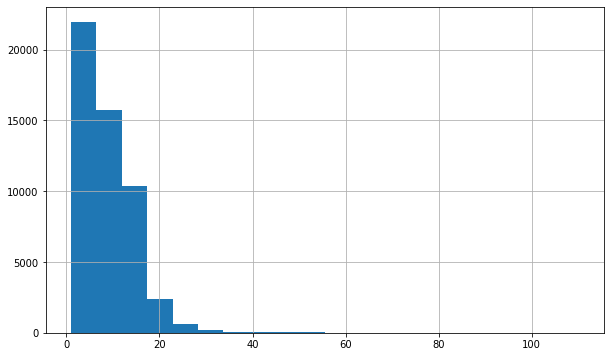

In [167]:
#Histograma de los años de los autos

cars_data2["years_until_posted"].hist(bins=20, figsize=(10,6))

<AxesSubplot:>

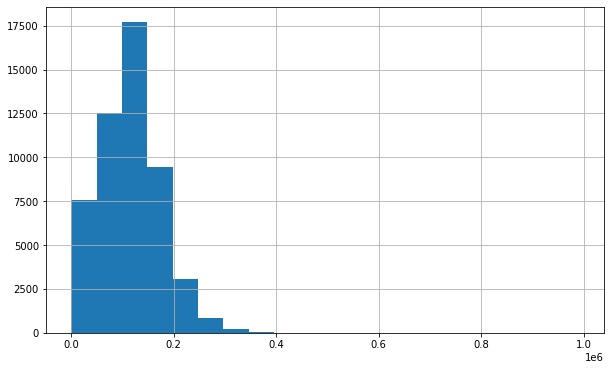

In [165]:
# Histograma del millaje de los autos

cars_data2["odometer"].hist(bins=20, figsize=(10,6))

<AxesSubplot:>

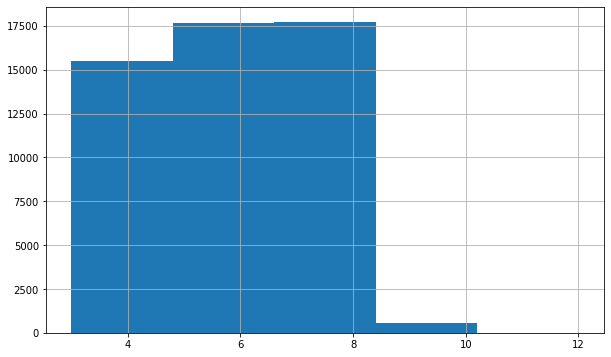

In [47]:
#Por número de cilindros
cars_data2["cylinders"].hist(bins=5, figsize=(10,6))


Se muestra la distribución por cada número de cilindros por modelo de auto. 

<AxesSubplot:>

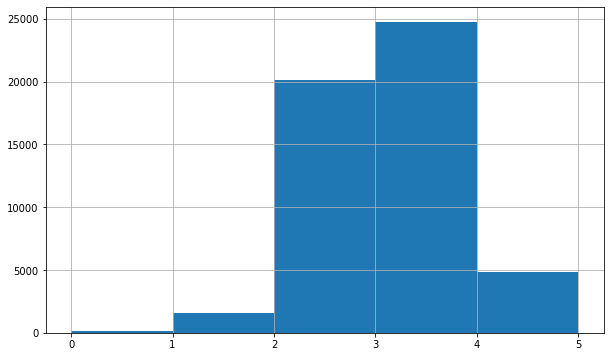

In [48]:
#Por condición al momento de la venta
cars_data2["condition"].hist(bins=5, figsize=(10,6))

## Estudiar y tratar valores atípicos

En esta sección se determinarán los valores máximos y mínimos a cada uno de los factores determinados, así se podrán determinar a partir de que rangos se encuentran. Serán de uitlidad los gráficos de caja el calculo de cuartiles y el rango IQR

In [50]:
# Determina los límites inferiores para valores atípicos para la columna price
cars_data2["price"].min()


1

In [51]:

cars_data2.sort_values(by="price", ascending=True)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median,day_posted,month_posted,year_posted,cars_year,years_until_posted,miles_per_year
31309,1,2010-01-01,chevrolet tahoe,3,8,gas,7726,automatic,SUV,unknown,0,2018-12-02,12,8.0,2,12,2018,2010,8,965.750000
11308,1,2019-01-01,dodge charger,3,6,gas,18485,automatic,sedan,white,1,2019-01-03,55,6.0,3,1,2019,2019,1,18485.000000
13322,1,2018-01-01,gmc acadia,3,10,gas,109026,other,SUV,custom,1,2018-09-19,14,6.0,19,9,2018,2018,1,109026.000000
13321,1,2015-01-01,toyota sienna,3,6,gas,45208,automatic,van,black,1,2018-05-11,17,6.0,11,5,2018,2015,3,15069.333333
13320,1,2018-01-01,toyota highlander,3,6,gas,13138,automatic,SUV,silver,1,2018-05-13,19,6.0,13,5,2018,2018,1,13138.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30601,189000,2014-01-01,ford f-150,2,6,gas,144000,automatic,truck,black,0,2018-07-21,42,8.0,21,7,2018,2014,4,36000.000000
27342,189000,2014-01-01,ford f-150,2,6,gas,151248,automatic,truck,black,0,2018-09-25,72,8.0,25,9,2018,2014,4,37812.000000
1308,189000,2014-01-01,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-03-02,56,8.0,2,3,2019,2014,5,30249.600000
11347,300000,2015-01-01,ram 2500,3,6,diesel,119773,automatic,truck,grey,1,2018-10-15,39,6.0,15,10,2018,2015,3,39924.333333


In [52]:
#Determinando cuantas filas con precio igual a 1 hay en el DataFrame
low_prices=cars_data2.query("price==1")
low_prices

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median,day_posted,month_posted,year_posted,cars_year,years_until_posted,miles_per_year
404,1,2014-01-01,chevrolet camaro,3,6,gas,71310,automatic,coupe,unknown,0,2018-07-14,29,6.0,14,7,2018,2014,4,17827.500000
3059,1,1998-01-01,chevrolet silverado,2,8,gas,164000,automatic,pickup,unknown,1,2018-10-11,49,8.0,11,10,2018,1998,20,8200.000000
3804,1,2007-01-01,chevrolet tahoe,2,8,gas,200,automatic,SUV,red,0,2019-03-18,63,8.0,18,3,2019,2007,12,16.666667
3898,1,1996-01-01,ford f-150,1,8,gas,163000,manual,truck,white,0,2019-02-23,54,8.0,23,2,2019,1996,23,7086.956522
4136,1,2004-01-01,chevrolet silverado,3,8,diesel,83000,automatic,pickup,unknown,1,2019-02-04,14,8.0,4,2,2019,2004,15,5533.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49647,1,2007-01-01,chevrolet trailblazer,3,8,gas,150026,automatic,SUV,black,1,2018-08-06,28,6.0,6,8,2018,2007,11,13638.727273
49657,1,2012-01-01,ford f150,3,8,gas,139700,other,pickup,red,1,2019-03-11,18,8.0,11,3,2019,2012,7,19957.142857
50193,1,1986-01-01,chevrolet silverado,2,8,gas,160500,automatic,truck,red,1,2018-11-30,50,8.0,30,11,2018,1986,32,5015.625000
50341,1,2003-01-01,gmc sierra 2500hd,2,8,diesel,212300,automatic,pickup,black,1,2019-04-12,28,8.0,12,4,2019,2003,16,13268.750000


<AxesSubplot:>

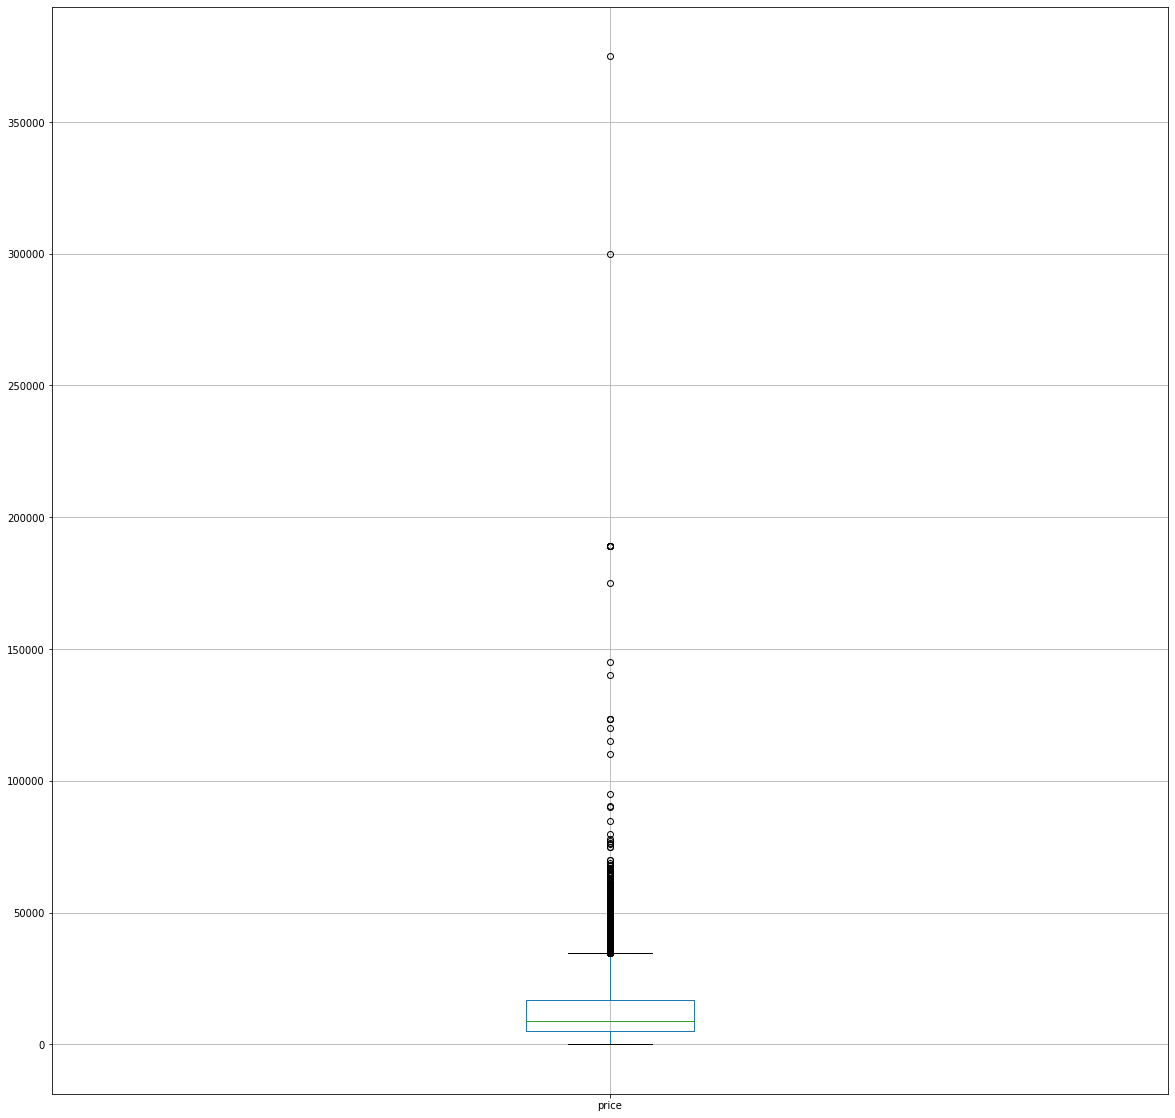

In [53]:
cars_data2.boxplot("price", figsize=(20,20))

In [54]:
cars_data2["price"].describe()

count     51470.000000
mean      12114.568856
std       10024.715630
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16799.000000
max      375000.000000
Name: price, dtype: float64

In [55]:
#Calculando los maximos y minimos teoricos para price
Q1 = cars_data2['price'].quantile(0.25)
Q3= cars_data2["price"].quantile(0.75)
IQR_price=Q3-Q1
max_price_limit=Q3+1.5*IQR_price
min_price_limit=Q1-1.5*IQR_price

(0.0, 990000.0)

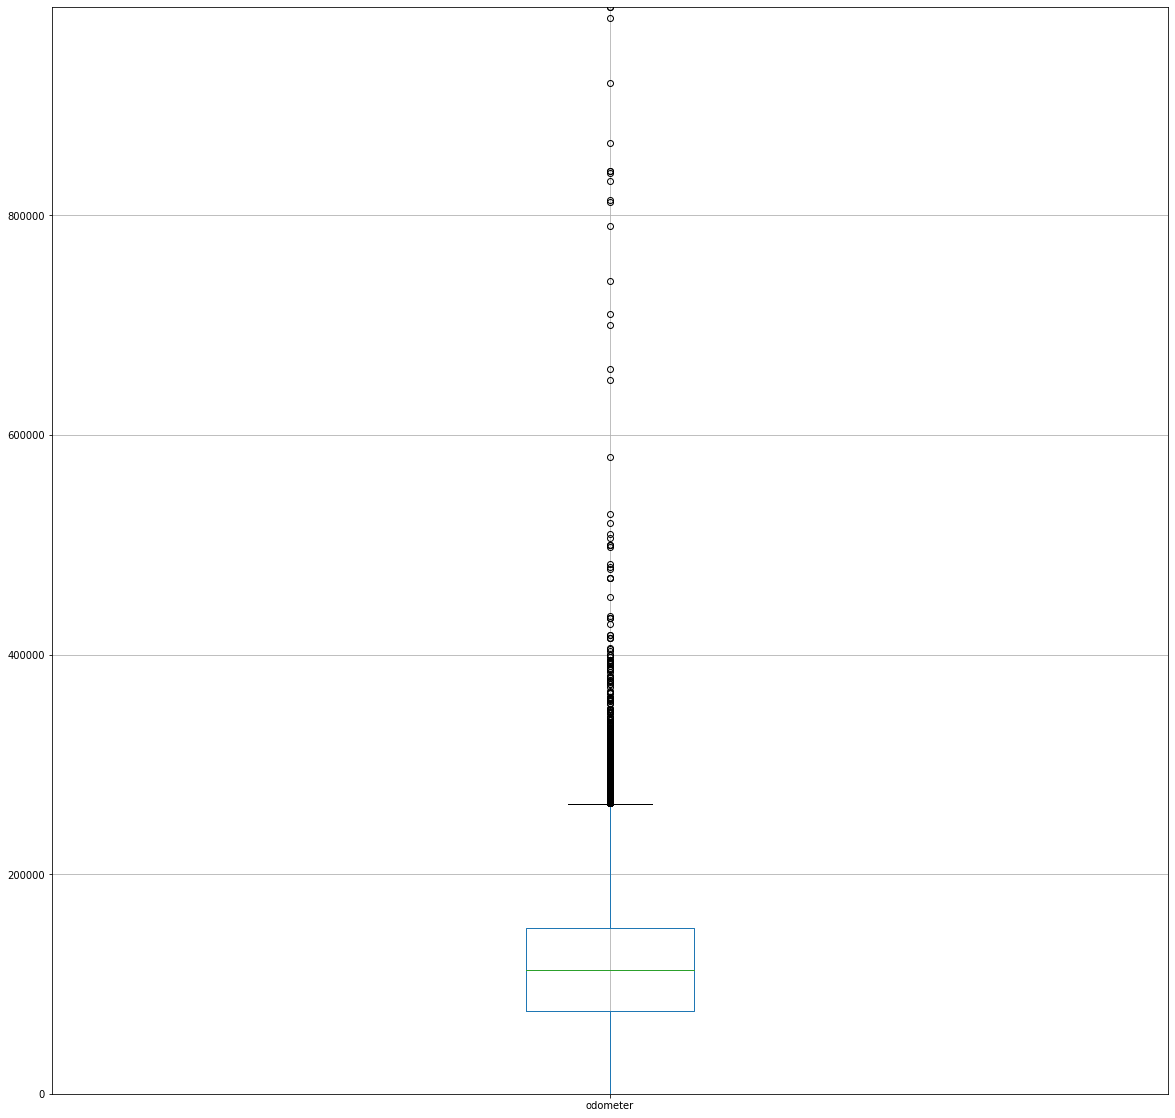

In [56]:
cars_data2.boxplot("odometer", figsize=(20,20))
plt.ylim(0,990000)

In [57]:
cars_data2["odometer"].describe()

count     51470.000000
mean     115273.507033
std       61363.167575
min           0.000000
25%       75000.000000
50%      112757.500000
75%      150764.000000
max      990000.000000
Name: odometer, dtype: float64

In [58]:
#Calculando los máximos y minimos para odometer

Q1 = cars_data2['odometer'].quantile(0.25)
Q3= cars_data2["odometer"].quantile(0.75)
IQR_odometer=Q3-Q1
max_odometer_limit=Q3+1.5*IQR_odometer
min_odometer_limit=Q1-1.5*IQR_odometer
Q1

75000.0

In [59]:
odometer_filtered=cars_data2.query("odometer<@max_odometer_limit and odometer>@min_odometer_limit")
odometer_filtered

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median,day_posted,month_posted,year_posted,cars_year,years_until_posted,miles_per_year
0,9400,2011-01-01,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,6.0,23,6,2018,2011,7,20714.285714
1,25500,2008-01-01,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,8.0,19,10,2018,2008,10,8870.500000
2,5500,2013-01-01,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,4.0,7,2,2019,2013,6,18333.333333
3,1500,2003-01-01,ford f-150,1,8,gas,191850,automatic,pickup,unknown,0,2019-03-22,9,8.0,22,3,2019,2003,16,11990.625000
4,14900,2017-01-01,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4.0,2,4,2019,2017,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51465,9249,2013-01-01,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,6.0,3,10,2018,2013,5,17627.200000
51466,2700,2002-01-01,honda civic,0,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,4.0,14,11,2018,2002,16,11343.750000
51467,3950,2009-01-01,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,4.0,15,11,2018,2009,9,14222.222222
51468,7455,2013-01-01,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,4.0,2,7,2018,2013,5,27914.600000


In [60]:
odometer_filtered.min().count()

20

In [61]:
cars_data2["years_until_posted"].describe()

count    51470.000000
mean         8.567262
std          6.090710
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: years_until_posted, dtype: float64

In [62]:
Q1 = cars_data2['years_until_posted'].quantile(0.25)
Q1

4.0

(0.0, 110.0)

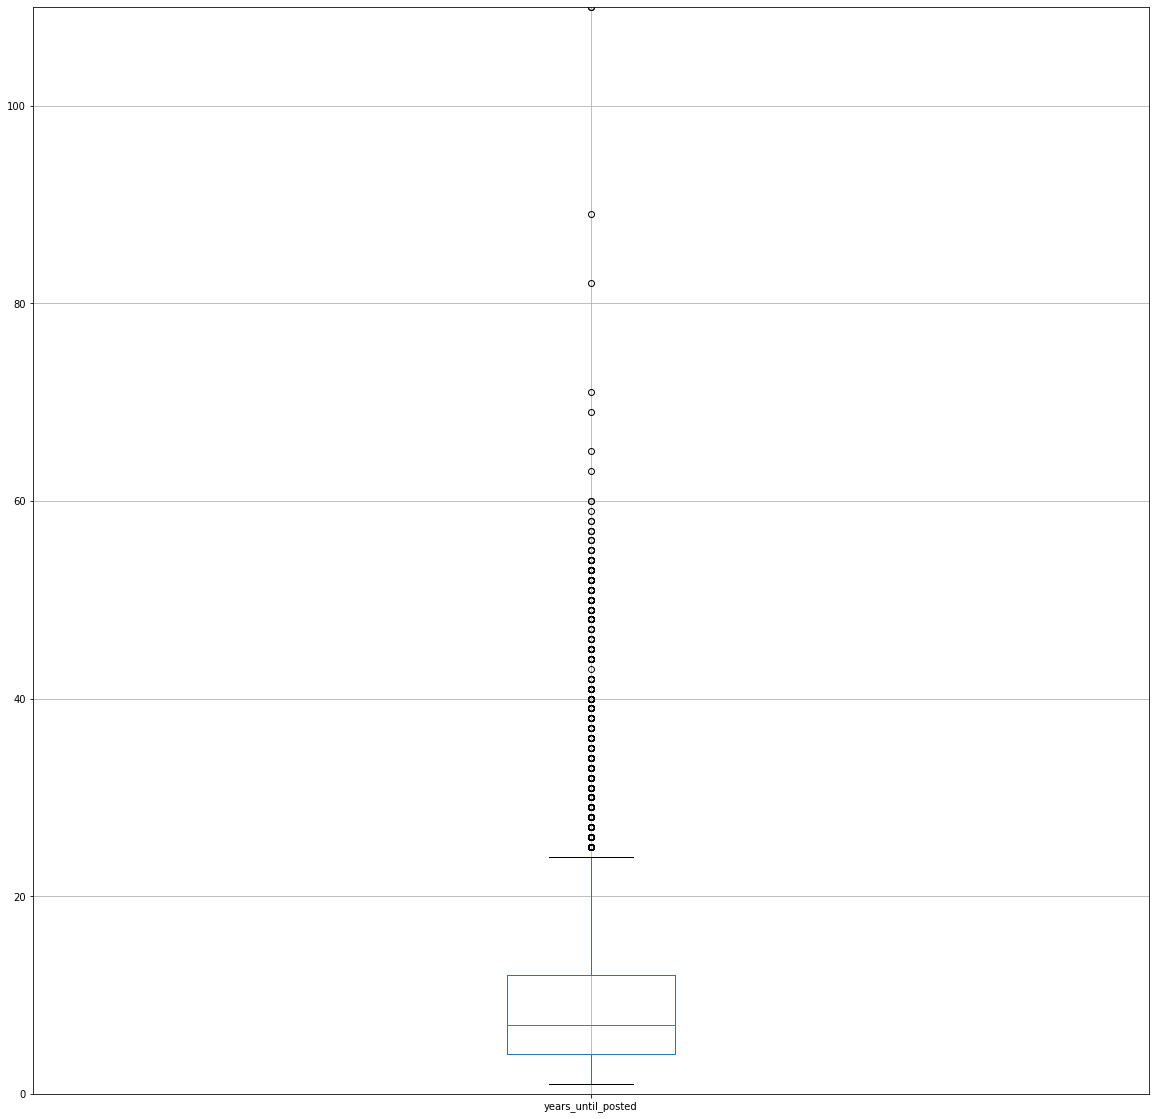

In [63]:
cars_data2.boxplot("years_until_posted", figsize=(20,20))
plt.ylim(0,110)

In [64]:
#Calculando los maximos y minimos para years_until_posted
Q1 = cars_data2['years_until_posted'].quantile(0.25)
Q3= cars_data2["years_until_posted"].quantile(0.75)
IQR_years=Q3-Q1
max_years_limit=Q3+1.5*IQR_years
min_years_limit=Q1-1.5*IQR_years


In [65]:
#Calculo de Límites superior y inferior para cylinders

Q1 = cars_data2['cylinders'].quantile(0.25)
Q3= cars_data2["cylinders"].quantile(0.75)
IQR_cylinders=Q3-Q1
max_cylinders_limit=Q3+1.5*IQR_cylinders
min_cylinders_limit=Q1-1.5*IQR_cylinders

In [66]:
# Determinar los límites superior e inferior para condition

Q1 = cars_data2['condition'].quantile(0.25)
Q3= cars_data2["condition"].quantile(0.75)
IQR_condition=Q3-Q1
max_condition_limit=Q3+1.5*IQR_condition
min_condition_limit=Q1-1.5*IQR_condition


In [67]:
# Almacena los datos sin valores atípicos en un DataFrame separado

clear_cars_data= cars_data2.query("price>@min_price_limit and price<@max_price_limit and odometer>@min_odometer_limit and odometer<@max_odometer_limit and years_until_posted>@min_years_limit and years_until_posted<@max_years_limit and cylinders>@min_cylinders_limit and cylinders<@max_cylinders_limit and condition>@min_condition_limit and condition<@max_condition_limit")
clear_cars_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median,day_posted,month_posted,year_posted,cars_year,years_until_posted,miles_per_year
0,9400,2011-01-01,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,6.0,23,6,2018,2011,7,20714.285714
1,25500,2008-01-01,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,8.0,19,10,2018,2008,10,8870.500000
2,5500,2013-01-01,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,4.0,7,2,2019,2013,6,18333.333333
3,1500,2003-01-01,ford f-150,1,8,gas,191850,automatic,pickup,unknown,0,2019-03-22,9,8.0,22,3,2019,2003,16,11990.625000
4,14900,2017-01-01,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,4.0,2,4,2019,2017,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,11750,2015-01-01,honda accord,3,4,gas,113181,automatic,coupe,unknown,0,2018-11-24,89,4.0,24,11,2018,2015,3,37727.000000
51465,9249,2013-01-01,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,6.0,3,10,2018,2013,5,17627.200000
51467,3950,2009-01-01,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,4.0,15,11,2018,2009,9,14222.222222
51468,7455,2013-01-01,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,4.0,2,7,2018,2013,5,27914.600000


In [68]:
clear_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48035 entries, 0 to 51469
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               48035 non-null  int64         
 1   model_year          48035 non-null  datetime64[ns]
 2   model               48035 non-null  object        
 3   condition           48035 non-null  int64         
 4   cylinders           48035 non-null  int64         
 5   fuel                48035 non-null  object        
 6   odometer            48035 non-null  int64         
 7   transmission        48035 non-null  object        
 8   type                48035 non-null  object        
 9   paint_color         48035 non-null  object        
 10  is_4wd              48035 non-null  int64         
 11  date_posted         48035 non-null  datetime64[ns]
 12  days_listed         48035 non-null  int64         
 13  median              48035 non-null  float64   

## Estudiar parámetros principales sin valores atípicos

[Utiliza los datos filtrados para crear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos). Saca conclusiones de cada histograma.]

<AxesSubplot:title={'center':'price'}, ylabel='Frequency'>

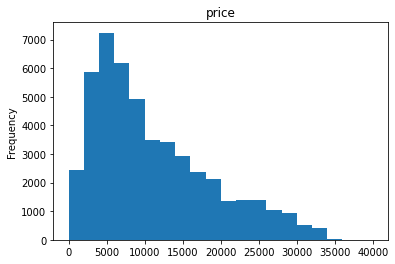

In [166]:
clear_cars_data["price"].plot(kind="hist", y="price", title="price",range=(0,40000), bins=20)



Se puede observar una disminución de la frecuencia en la primera sección del gráfico de casi 8000 a unos 2500, luego hay un aumento en el valor en el eje x de 5000 que llega a un maximo de 7000, a partir de allí comienza un descenso a medida que crecen los valores en el eje x.

<AxesSubplot:title={'center':'years_until_posted'}, ylabel='Frequency'>

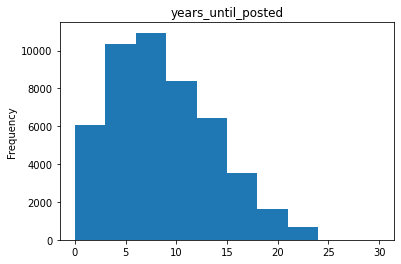

In [70]:
clear_cars_data["years_until_posted"].plot(kind="hist", y="years_until_posted", title="years_until_posted", range=(0,30))

En comparación con el primer histograma de esta variable se observa un descenso del pico inocoal que estaba por arriba de los 20000, ahora se ve que está en los 6000, luego hay un aumento por arriba de 10000 (mucho menor que en histograma inicial) y luego aocurre un descenso a medida que se mueve hacia la derecha de los valores en el eje x.

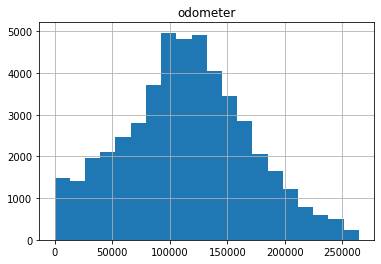

In [71]:
clear_cars_data["odometer"].hist(bins=20)
plt.title("odometer")
plt.show()

Para el gráfico inicial vemos un maximo en 150000 por encima de los 17500, ahora ese maximo se ha eliminado ahora los maximos se localizan entre 100000 y 125000, luego de este punto comienza el descensoa madida que aumentan los valores en el eje x. 

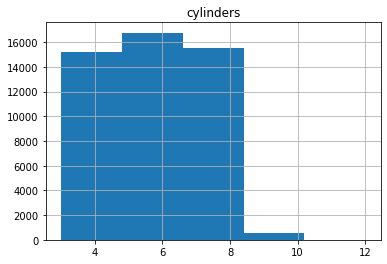

In [72]:
clear_cars_data["cylinders"].hist(bins=5)
plt.title("cylinders")
plt.show()

Este gráfico es similar en distribución al anterior de esta variable, disminuye el pico de los 17500 a un poco por arriba de los 16000.

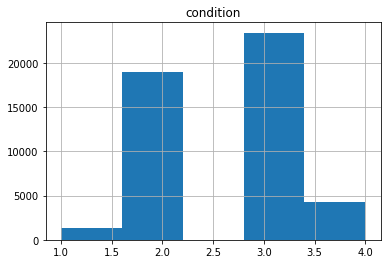

In [170]:
clear_cars_data["condition"].hist(bins=5)
plt.title("condition")
plt.show()

En comparación al primer histograma se eliminan los valores que estaban en 0, el pico máximo es casi igual al original

## Periodo de colocación de los anuncios

En esta sección se buscará determinar cuanto es el tiempo promedio de colocación de un anuncio y cuando se elimina muy rápido o cuando es un tiempo de publicación excesivamente largo.

In [74]:
#Obteniendo la media y mediana para days_listed utilizando describe()
clear_cars_data["days_listed"].describe()


count    48035.000000
mean        39.549683
std         28.230293
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Los días que los anuncios permanecen publicados tienen una media de 39 días y una mediana de 33 días 

<AxesSubplot:>

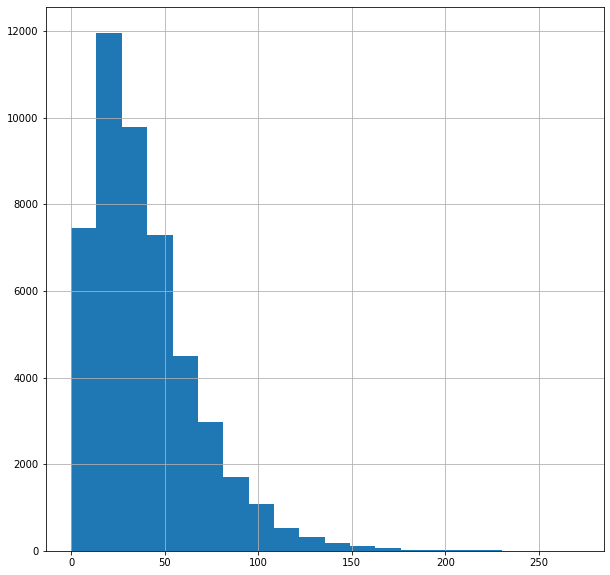

In [75]:
#Trazado de histograma para determinar la vida útil habitual de un anuncio
clear_cars_data["days_listed"].hist(bins=20, figsize=(10,10))

Para saber cual es el tiempo habitual de un anuncio vamos a utilizar un gráfico de cajas

<AxesSubplot:>

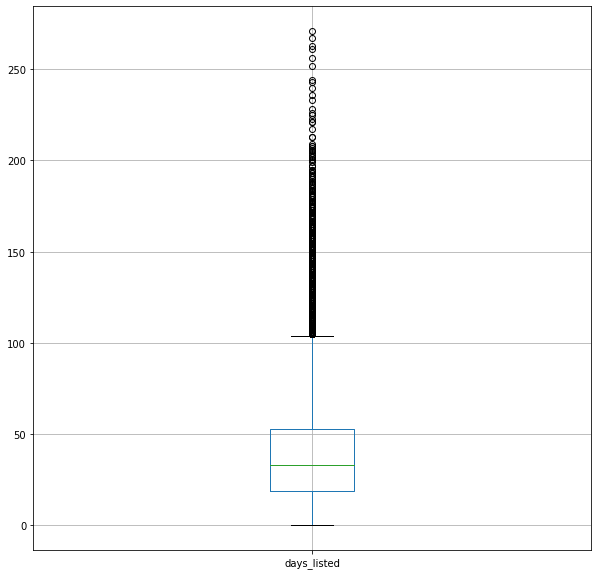

In [77]:
clear_cars_data.boxplot("days_listed", figsize=(10,10))

Podemos ver que un anuncio tiene un tiempo de duración de 19 a 53 días. Por debajo de 19 días se consideraria muy rápido y por 
arriba de los 100 días sería un tiempo muy largo para mantener la publicación.

## Precio promedio por cada tipo de vehículo

In [128]:
#Calculando el promedio de precios por tipo de auto, se hará a través de una tabla dinámica
avg_price_by_type=clear_cars_data.pivot_table(index="type", values="price", aggfunc=["median", "count"])
avg_price_by_type

,median,count
,price,price
type,,
SUV,8795,11837
bus,28990,21
convertible,12988,333
coupe,12997,1990
hatchback,5995,997
mini-van,6500,1142
offroad,12500,182
other,8995,233


Los autos con más valor son los autobuses con una mediana de 28990, y los convertibles con precio de 12988

In [129]:
#Se cuenta el numero de anuncios por tipo de vehiculo
number_of_car_placed_by_type=clear_cars_data["type"].value_counts().sort_values(ascending=False)
number_of_car_placed_by_type

sedan          11927
SUV            11837
truck          11045
pickup          6248
coupe           1990
wagon           1500
mini-van        1142
hatchback        997
van              580
convertible      333
other            233
offroad          182
bus               21
Name: type, dtype: int64

<AxesSubplot:>

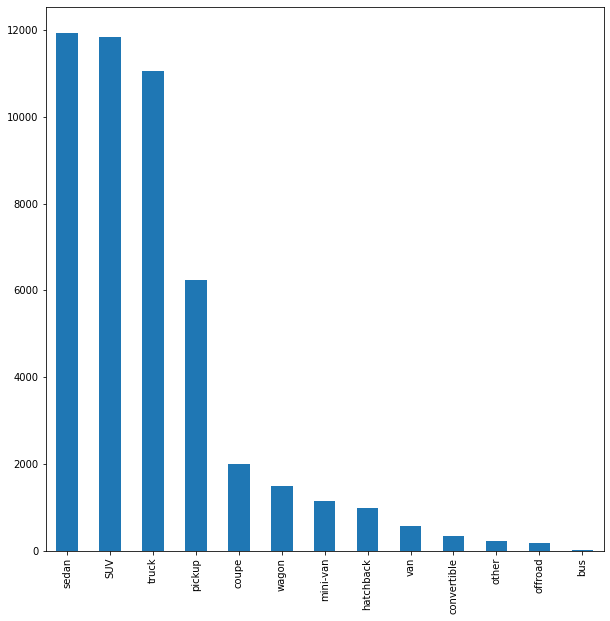

In [130]:
number_of_car_placed_by_type.plot(kind="bar", figsize=(10,10))
plt.

En el grafico de barras se puede observar que los tipos de autos con mayor cantidad de anuncios son los sedan con 11927 y las 
SUV con 11837

## Factores de precio

In [137]:
#Estudiando primero el tipo de auto sedan, se realizará un slice primero con sedan y luego con los SUV, se guardaran en variables separadas
price_factors_for_sedan= clear_cars_data.query('type== "sedan"')
price_factors_for_sedan= price_factors_for_sedan[["price", "years_until_posted", "miles_per_year", "condition", "transmission", "paint_color"]]
price_factors_for_sedan= price_factors_for_sedan.reset_index(drop=True) 
price_factors_for_sedan

,price,years_until_posted,miles_per_year,condition,transmission,paint_color
0,5500,6,18333.333333,4,automatic,red
1,14900,2,40451.500000,3,automatic,black
2,14990,4,14488.500000,3,automatic,black
3,12990,3,26404.000000,3,automatic,white
4,8990,7,15877.428571,3,automatic,grey
...,...,...,...,...,...,...
11922,3750,13,8476.923077,3,automatic,silver
11923,9249,5,17627.200000,4,automatic,black
11924,3950,9,14222.222222,3,automatic,blue
11925,7455,5,27914.600000,2,automatic,black


In [140]:
#Revisando las variables categoricas, para poder incluirlas en el analisis deben tener al menos 50 anuncios
#En paint_color los colores yelow, purple y orange estan por fuera de ese minimo, habrá que eliminarlos para el analisis
price_factors_for_sedan["paint_color"].value_counts()

unknown    2146
silver     2020
black      1747
grey       1602
white      1474
blue       1213
red         928
custom      291
brown       251
green       202
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

In [141]:
#Revisando para transmission el numero de anuncios
price_factors_for_sedan["transmission"].value_counts()

automatic    11224
manual         572
other          131
Name: transmission, dtype: int64

In [152]:
#Haciendo un nuevo filtrado para sedan sin los colores orange, purple y yellow
price_factors_for_sedan_filtered= price_factors_for_sedan.query('paint_color!="yellow" and paint_color!="orange" and paint_color!="purple"')
price_factors_for_sedan_filtered

,price,years_until_posted,miles_per_year,condition,transmission,paint_color
0,5500,6,18333.333333,4,automatic,red
1,14900,2,40451.500000,3,automatic,black
2,14990,4,14488.500000,3,automatic,black
3,12990,3,26404.000000,3,automatic,white
4,8990,7,15877.428571,3,automatic,grey
...,...,...,...,...,...,...
11922,3750,13,8476.923077,3,automatic,silver
11923,9249,5,17627.200000,4,automatic,black
11924,3950,9,14222.222222,3,automatic,blue
11925,7455,5,27914.600000,2,automatic,black


<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

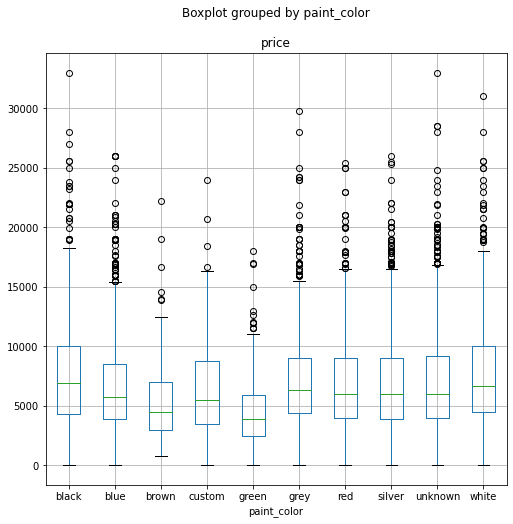

In [144]:
#Realizando los gráficos de caja para la variable categorica paint_color
price_factors_for_sedan_filtered.boxplot(column="price", by="paint_color", figsize=(8,8))


<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

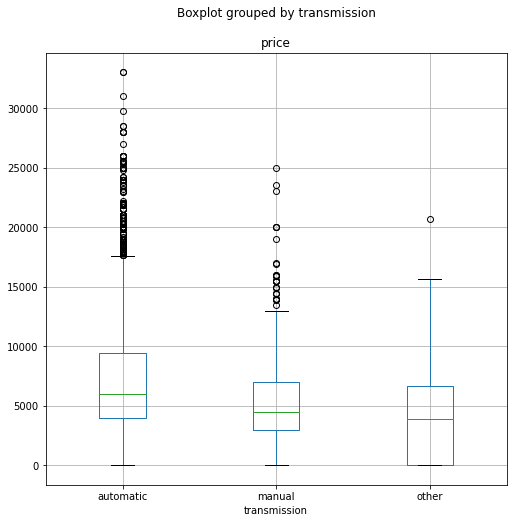

In [145]:
#Realizando los gráficos de caja para la variable categorica transmission
price_factors_for_sedan_filtered.boxplot(column="price", by="transmission", figsize=(8,8))

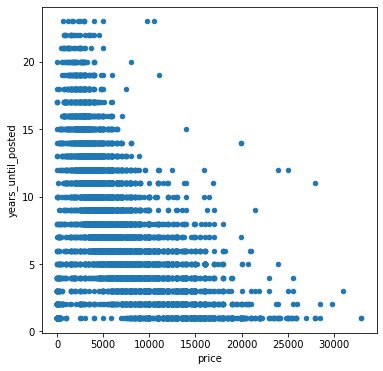

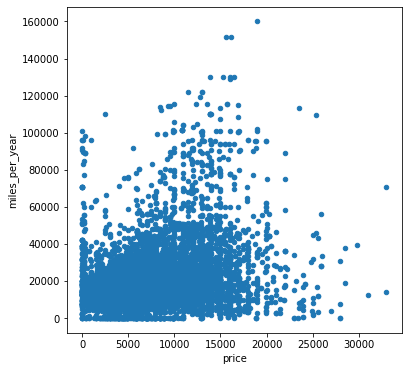

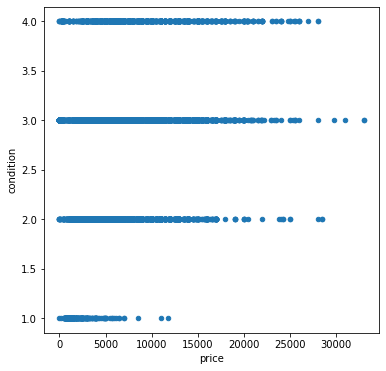

In [148]:
#Juntando todas las columnas con variables numericas se realizará un bucle para automatizar el trazado de gráficos de dispersión 

name_columns=["years_until_posted", "miles_per_year", "condition"]
for column in name_columns:
    price_factors_for_sedan_filtered.plot(kind="scatter", figsize=(6,6), x="price", y=column)

In [158]:
#Haciendo una matriz de correlación para ver la dependencia entre los factores para los sedan
price_factors_for_sedan_filtered.corr()

,price,years_until_posted,miles_per_year,condition
price,1.000000,-0.617806,0.312944,0.289811
years_until_posted,-0.617806,1.000000,-0.531486,-0.318547
miles_per_year,0.312944,-0.531486,1.000000,0.078716
condition,0.289811,-0.318547,0.078716,1.000000


In [138]:
#Ahora repitiendo el paso anterior pero para los SUV
price_factors_for_suv= clear_cars_data.query('type== "SUV"')
price_factors_for_suv= price_factors_for_suv[["price", "years_until_posted", "miles_per_year", "condition", "transmission", "paint_color"]]
price_factors_for_suv= price_factors_for_suv.reset_index(drop=True) 
price_factors_for_suv

,price,years_until_posted,miles_per_year,condition,transmission,paint_color
0,9400,7,20714.285714,2,automatic,unknown
1,15990,6,18245.500000,3,automatic,black
2,11500,6,17362.333333,3,automatic,unknown
3,9200,11,13381.000000,3,automatic,blue
4,12990,10,13228.500000,3,automatic,black
...,...,...,...,...,...,...
11832,9500,7,20642.857143,2,automatic,unknown
11833,4999,16,11118.812500,3,automatic,unknown
11834,6995,6,26166.666667,3,automatic,white
11835,7995,8,13886.000000,4,automatic,unknown


In [150]:
#Revisando las variables categoricas, para poder incluirlas en el analisis deben tener al menos 50 anuncios
#En paint_color, para el caso de las suv, los colores yelow y purple estan por fuera de ese minimo, habrá que eliminarlos para el analisis
price_factors_for_suv["paint_color"].value_counts()

unknown    2132
black      2080
white      1859
silver     1525
grey       1144
blue       1007
red         867
green       411
brown       351
custom      296
orange       81
yellow       45
purple       39
Name: paint_color, dtype: int64

In [151]:
#Revisando para transmission el numero de anuncios
price_factors_for_suv["transmission"].value_counts()

automatic    11220
manual         459
other          158
Name: transmission, dtype: int64

In [153]:
#Haciendo un nuevo filtrado para los suv sin los colores purple y yellow
price_factors_for_suv_filtered= price_factors_for_sedan.query('paint_color!="yellow" and paint_color!="purple"')
price_factors_for_suv_filtered

,price,years_until_posted,miles_per_year,condition,transmission,paint_color
0,5500,6,18333.333333,4,automatic,red
1,14900,2,40451.500000,3,automatic,black
2,14990,4,14488.500000,3,automatic,black
3,12990,3,26404.000000,3,automatic,white
4,8990,7,15877.428571,3,automatic,grey
...,...,...,...,...,...,...
11922,3750,13,8476.923077,3,automatic,silver
11923,9249,5,17627.200000,4,automatic,black
11924,3950,9,14222.222222,3,automatic,blue
11925,7455,5,27914.600000,2,automatic,black


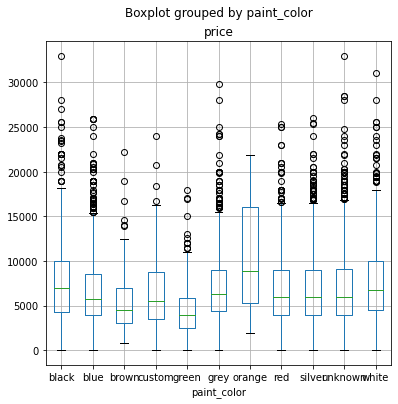

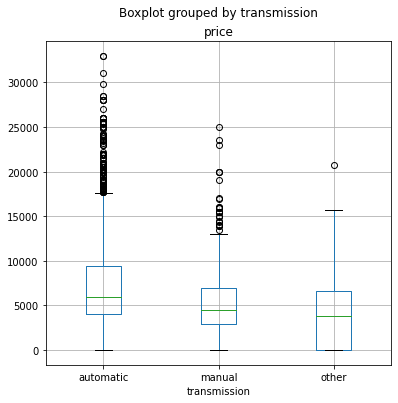

In [155]:
#Automatizando los graficos para las variables categoricas para el caso de los suv a través de un bucle for

name_columns=["paint_color", "transmission"]
for column in name_columns:
    price_factors_for_suv_filtered.boxplot(figsize=(6,6), column="price", by=column)



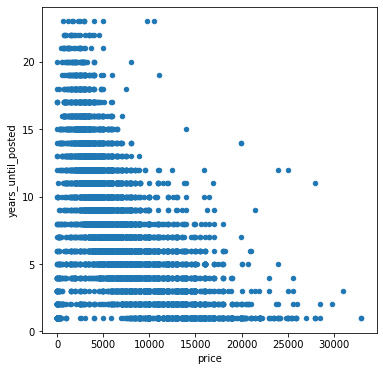

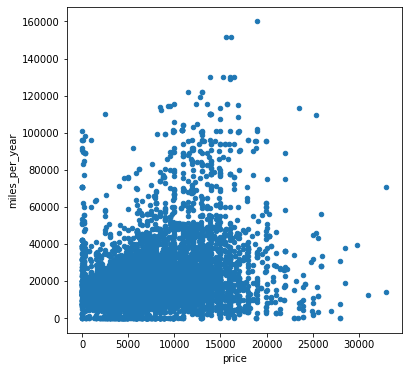

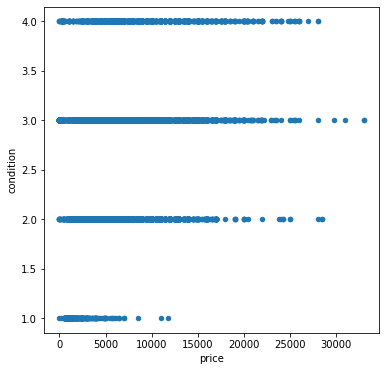

In [156]:
#El bucle para automatizar el trazado de los graficos de dispersión para las columnas numericas para las suv
name_columns=["years_until_posted", "miles_per_year", "condition"]
for column in name_columns:
    price_factors_for_suv_filtered.plot(kind="scatter", figsize=(6,6), x="price", y=column)

In [159]:
#Haciendo una matriz de correlación para ver la dependencia entre los factores para los suv
price_factors_for_suv_filtered.corr()

,price,years_until_posted,miles_per_year,condition
price,1.000000,-0.617974,0.312833,0.289932
years_until_posted,-0.617974,1.000000,-0.531500,-0.318773
miles_per_year,0.312833,-0.531500,1.000000,0.078846
condition,0.289932,-0.318773,0.078846,1.000000


## Conclusión general



Durante el procesamiento de datos se realizaron los siguientes arreglos:

* Se imputaron los valores ausentes utilizando las medianas en las columnas **odometer**, **model_year**, **cylinders**.

* Para la columna de **paint_color** se completaron los valores ausentes con la cadena "unknown" y para la de **is_4wd** se completó con ceros basado en que si tienian 4x4 correspondia a 1 y por el contrario se le asignaba 0, todo esto revisando los valores en la columna para comparar entre los diferentes modelos.

* No se encontraron valores duplicados en los datos.

* Se corrigieron las columnas de **odometer**, **cylinders** e **is_4wd** convertirlas a *int* utilizando astype, las columnas **date_posted** y **model_year** se cambiaron utilizando *pd.to_datetime*.

* Al eliminar algunos valores ausentes utilizando *dropna* se realizó el reseteo del indice.

De los valores atipicos se puede decir que tienen el poder de distorsionar la información que se puede obtener de un conjunto de datos, bien sea por errores al momento de captarlos o al registarlos. Los histogramas y los gráficos de caja son herramientas de gran utilidad que puede ayudar a determinar donde se encuentran los valores atipicos. Otra gran erramienta es los *query* para poder realizar segmentaciones donde no esten presentes estos datos.

También se pudo determinar que un anuncio tiene un tiempo de duración de 19 a 53 días, y que los factores que aumentan los precios en los vehiculos son la transmisión automatica y el color negro.

De la matríz de correlación se pueden obtener las siguientes conclusiones para los dos modelos más vendidos:

* Se puede observar que le coeficiente de Pearson es negativo cuando se compara el precio contra el tiempo ya que a medida que el auto tiene más años disminuye su precio.

* Para el millaje el coeficiente se acerca 0 ya que el millaje aumenta pero el precio puede que varie muy poco

* Para la correlación precio-condición también se acerca a cero el coeficiente ya que se puede mantener una condición a lo largo del tiempo y que varie el precio tambíen muy poco.

De lo anterior se puede resumir que el factor que más influye sobre el precio de un vehiculo es los años de antiguedad del mismo.

